# Selection of Projects

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML, display
import tabulate

In [2]:
api_data = pd.read_csv("../../data/api_data.csv")

print(f"CSV has {len(api_data)} projects.")

CSV has 2731 projects.


### Dataset of projects

In [3]:
api_data

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario,/sebastianbenz/Jnario,133.0,False,False,...,146.0,35.0,0.0,19.0,32.0,37.0,1303.0,9.0,19.0,20.0
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab,/CCI-MIT/XCoLab,15.0,False,False,...,9.0,288.0,0.0,8.0,10.0,10.0,10045.0,25.0,97.0,0.0
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo,/apache/accumulo,864.0,False,False,...,628.0,1394.0,0.0,88.0,333.0,351.0,10876.0,131.0,3.0,38.0
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,False,False,...,0.0,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,False,False,...,173.0,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1,False,pingpongboss/Phone-Modem,/pingpongboss/Phone-Modem,30.0,False,False,...,0.0,0.0,0.0,5.0,9.0,9.0,24.0,2.0,1.0,0.0
2727,3468682,htdvisser/Skt,NaN,1,True,htdvisser/Skt,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,2130242,justjoheinz/STLDroid,NaN,1,False,justjoheinz/STLDroid,/justjoheinz/STLDroid,10.0,False,False,...,1.0,0.0,0.0,1.0,4.0,4.0,24.0,1.0,1.0,5.0
2729,3355503,SpoutDev/BukkitBridge,NaN,1,False,SpoutDev/BukkitBridge,/SpoutDev/BukkitBridge,19.0,False,False,...,0.0,53.0,0.0,17.0,9.0,9.0,248.0,21.0,1.0,0.0


### Selected projects from the dataset

We selected projects with at least 1000 chunks, resulting in a set of 29 projects

#### Removing the projects that are possible forks for having commits in commom, we select 23 from the initial 29 projects.

In [4]:
selected_projects29 = api_data[api_data.chunks >= 1000]

In [5]:
projs = [("freenet/fred", 0),
("apache/directory-server", 0),
("Ramblurr/Anki-Android", 0),
("alexo/wro4j", 0),
("getrailo/railo", 0),
("atlasapi/atlas", 0),
("hibernate/hibernate-orm", 0),
("TeamDev-Ltd/OpenFaces", 0),
("CloudStack-extras/CloudStack-archive", 0),
("zkoss/zk", 0),
("eucalyptus/eucalyptus", 0),
("alkacon/opencms-core", 0),
("SINTEF-9012/ThingML", 0),
("Unidata/thredds", 0),
("apache/accumulo", 0),
("jgralab/jgralab", 0),
("sebastianbenz/Jnario", 0),
("CCI-MIT/XCoLab", 0),
("apache/lucene-solr", 0),
("android/platform_frameworks_base", 0),
("elastic/elasticsearch", 1),
("eclipse/jetty.project", 1),
("revolsys/com.revolsys.open", 1)]

new_projs = pd.DataFrame.from_records(projs, columns=['project', 'NA'])
new_projs

,project,NA
0,freenet/fred,0
1,apache/directory-server,0
2,Ramblurr/Anki-Android,0
3,alexo/wro4j,0
4,getrailo/railo,0
5,atlasapi/atlas,0
6,hibernate/hibernate-orm,0
7,TeamDev-Ltd/OpenFaces,0
8,CloudStack-extras/CloudStack-archive,0
9,zkoss/zk,0


In [6]:
selected_projects = pd.merge(api_data, new_projs, on='project', how='inner')
selected_projects

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags,NA
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario,/sebastianbenz/Jnario,133.0,False,False,...,35.0,0.0,19.0,32.0,37.0,1303.0,9.0,19.0,20.0,0
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab,/CCI-MIT/XCoLab,15.0,False,False,...,288.0,0.0,8.0,10.0,10.0,10045.0,25.0,97.0,0.0,0
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo,/apache/accumulo,864.0,False,False,...,1394.0,0.0,88.0,333.0,351.0,10876.0,131.0,3.0,38.0,0
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,False,False,...,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0,0
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,False,False,...,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0,0
5,3405664,jgralab/jgralab,NaN,2590,False,jgralab/jgralab,/jgralab/jgralab,15.0,False,False,...,0.0,0.0,13.0,3.0,3.0,7630.0,11.0,8.0,70.0,0
6,223355,alexo/wro4j,NaN,2078,False,alexo/wro4j,/alexo/wro4j,444.0,False,False,...,103.0,0.0,35.0,113.0,114.0,3619.0,37.0,55.0,46.0,0
7,2045207,eclipse/jetty.project,NaN,1921,False,eclipse/jetty.project,/eclipse/jetty.project,3093.0,False,False,...,2386.0,20.0,272.0,1591.0,1682.0,22856.0,309.0,45.0,371.0,1
8,1022930,CloudStack-extras/CloudStack-archive,NaN,1779,False,CloudStack-extras/CloudStack-archive,/CloudStack-extras/CloudStack-archive,256.0,False,False,...,15.0,0.0,23.0,67.0,79.0,12035.0,39.0,195.0,121.0,0
9,185026,freenet/fred,NaN,1584,False,freenet/fred,/freenet/fred,685.0,False,False,...,722.0,48.0,87.0,161.0,171.0,30800.0,71.0,99.0,2015.0,0


### Descriptive statistics of the selected projects

In [7]:
selected_projects.describe()

,id,chunks,stargazerCount,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags,NA
count,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,3.635864e+06,2487.565217,3510.956522,1439.130435,2699.521739,7.521739,232.304348,1449.347826,1532.130435,38918.782609,240.565217,76.043478,232.478261,0.130435
std,1.021909e+07,2285.919903,11365.360749,5587.578206,9305.059474,14.202655,590.037089,4051.180216,4210.002055,115836.117912,651.763609,114.823374,447.985883,0.344350
min,6.588500e+04,1018.000000,4.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,1303.000000,2.000000,3.000000,0.000000,0.000000
25%,6.171335e+05,1262.000000,75.500000,0.000000,35.000000,0.000000,18.000000,30.500000,33.000000,4439.000000,24.500000,9.500000,22.000000,0.000000
50%,1.775980e+06,1557.000000,256.000000,9.000000,148.000000,0.000000,43.000000,113.000000,166.000000,10772.000000,39.000000,22.000000,63.000000,0.000000
75%,2.331440e+06,2334.000000,822.500000,223.000000,1442.000000,10.000000,110.000000,345.500000,355.500000,25220.500000,101.000000,98.000000,231.500000,0.000000
max,5.022949e+07,10372.000000,54627.000000,26815.000000,45097.000000,48.000000,2781.000000,19045.000000,19739.000000,566598.000000,3118.000000,506.000000,2015.000000,1.000000


### Descriptive statistics of the dataset

In [8]:
api_data.describe()

,id,chunks,stargazerCount,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
count,2.731000e+03,2731.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,2.519585e+06,64.373856,439.363636,171.436826,160.190678,5.313174,45.231510,166.460709,178.119800,2254.608629,49.839753,16.428737,64.461864
std,2.178206e+06,335.082855,2260.389257,921.765488,1069.528379,37.428892,149.257226,920.841894,971.760926,13877.325509,148.223465,90.236012,522.061764
min,1.904000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.342908e+06,2.000000,6.000000,0.000000,1.000000,0.000000,4.000000,3.000000,4.000000,148.750000,3.000000,2.000000,0.000000
50%,2.466190e+06,7.000000,30.000000,6.000000,11.000000,0.000000,12.000000,19.000000,20.000000,441.000000,10.000000,4.000000,8.000000
75%,3.592512e+06,27.000000,155.000000,60.000000,57.000000,0.000000,37.000000,78.250000,86.000000,1343.000000,30.000000,11.000000,34.000000
max,5.108842e+07,10372.000000,54627.000000,26815.000000,45097.000000,1537.000000,3489.000000,29040.000000,29612.000000,566598.000000,3118.000000,3172.000000,21991.000000


### Histograms of the selected projects

<ipython-input-9-104694e1eeea>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  selected_projects.hist(bins=20, ax=ax, log=True)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'chunks'}>,
        <AxesSubplot:title={'center':'stargazerCount'}>,
        <AxesSubplot:title={'center':'issues'}>],
       [<AxesSubplot:title={'center':'pullRequests'}>,
        <AxesSubplot:title={'center':'releases'}>,
        <AxesSubplot:title={'center':'watchers'}>,
        <AxesSubplot:title={'center':'forks'}>],
       [<AxesSubplot:title={'center':'forkCount'}>,
        <AxesSubplot:title={'center':'commits'}>,
        <AxesSubplot:title={'center':'contributors'}>,
        <AxesSubplot:title={'center':'branches'}>],
       [<AxesSubplot:title={'center':'tags'}>,
        <AxesSubplot:title={'center':'NA'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

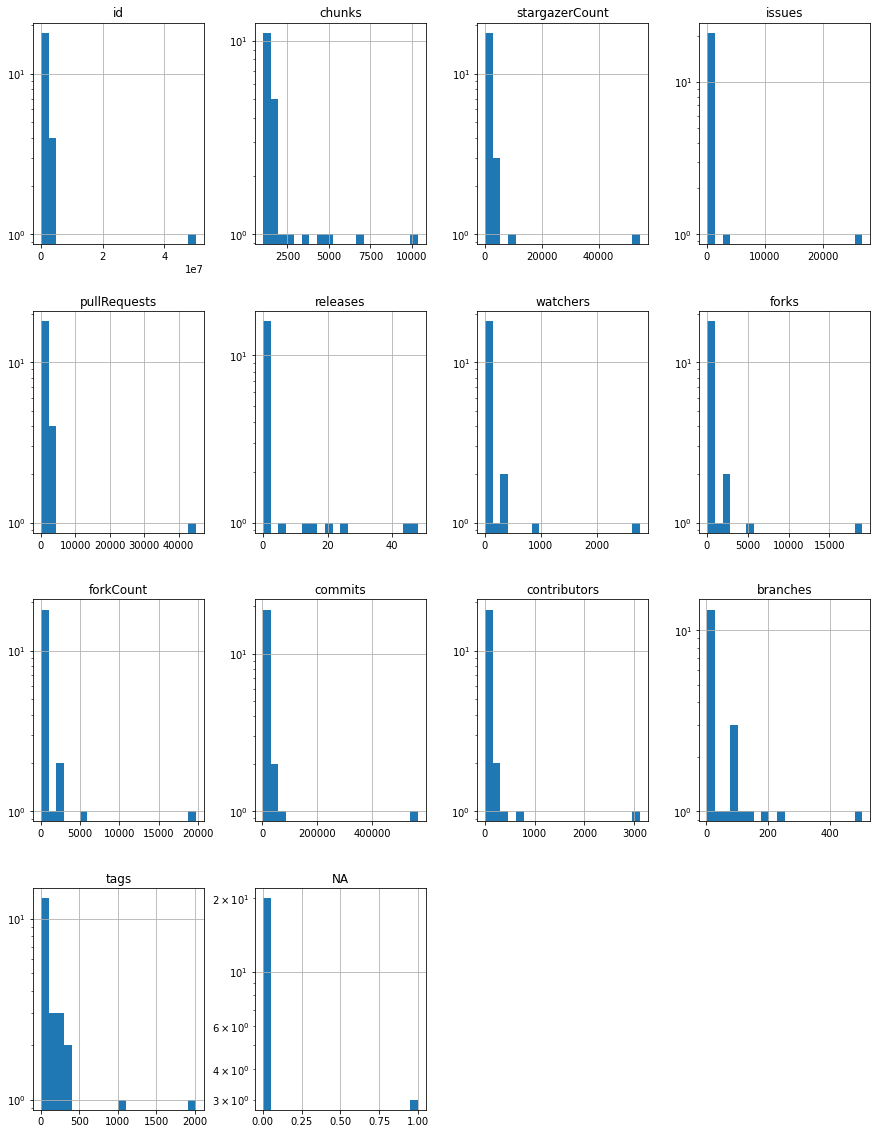

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
selected_projects.hist(bins=20, ax=ax, log=True)

### Histograms of the dataset

<ipython-input-10-74f1a7c1ff62>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  api_data.hist(bins=20, ax=ax, log=True)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'chunks'}>,
        <AxesSubplot:title={'center':'stargazerCount'}>,
        <AxesSubplot:title={'center':'issues'}>],
       [<AxesSubplot:title={'center':'pullRequests'}>,
        <AxesSubplot:title={'center':'releases'}>,
        <AxesSubplot:title={'center':'watchers'}>,
        <AxesSubplot:title={'center':'forks'}>],
       [<AxesSubplot:title={'center':'forkCount'}>,
        <AxesSubplot:title={'center':'commits'}>,
        <AxesSubplot:title={'center':'contributors'}>,
        <AxesSubplot:title={'center':'branches'}>],
       [<AxesSubplot:title={'center':'tags'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

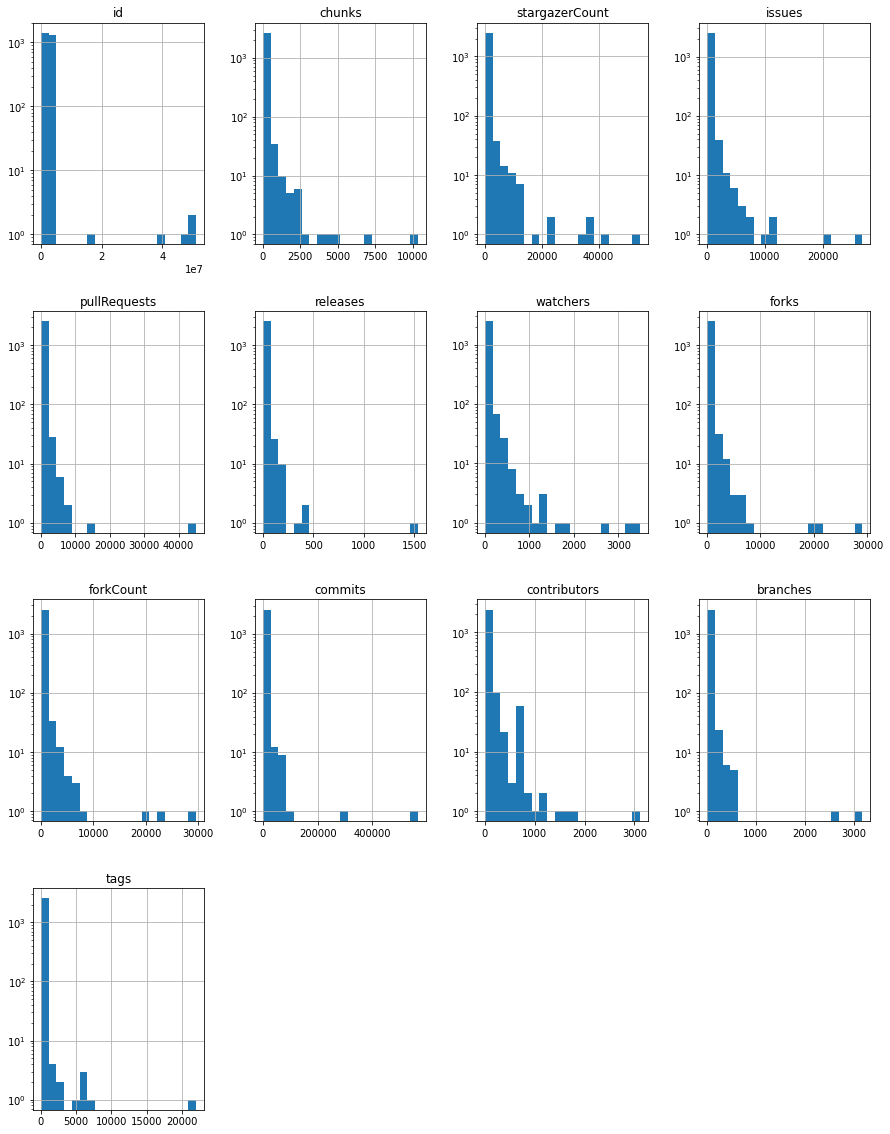

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
api_data.hist(bins=20, ax=ax, log=True)

<AxesSubplot:>

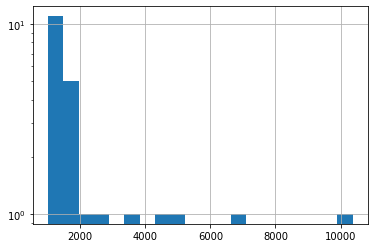

In [11]:
selected_projects["chunks"].hist(bins=20, log=True)

<AxesSubplot:>

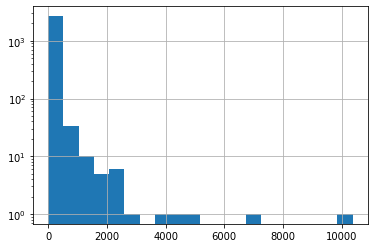

In [12]:
api_data["chunks"].hist(bins=20, log=True)

<AxesSubplot:xlabel='stargazerCount', ylabel='commits'>

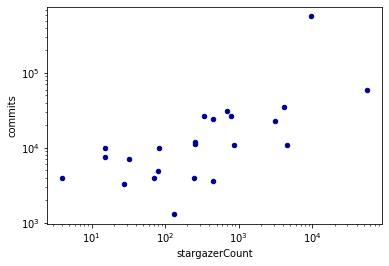

In [13]:
selected_projects.plot.scatter(x="stargazerCount", y="commits", c="DarkBlue", logx=True, logy=True)

<AxesSubplot:xlabel='stargazerCount', ylabel='commits'>

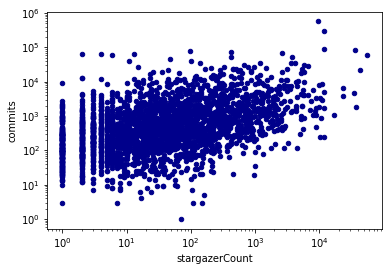

In [14]:
api_data.plot.scatter(x="stargazerCount", y="commits", c="DarkBlue", logx=True, logy=True)

### Scatterplot matrix of the selected projects

<ipython-input-15-a90cc65e347c>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(selected_projects[["chunks", "stargazerCount", "issues", "primaryLanguage", "pullRequests"]], alpha=0.5, ax=ax)


array([[<AxesSubplot:xlabel='chunks', ylabel='chunks'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='chunks'>,
        <AxesSubplot:xlabel='issues', ylabel='chunks'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='chunks'>],
       [<AxesSubplot:xlabel='chunks', ylabel='stargazerCount'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='stargazerCount'>,
        <AxesSubplot:xlabel='issues', ylabel='stargazerCount'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='stargazerCount'>],
       [<AxesSubplot:xlabel='chunks', ylabel='issues'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='issues'>,
        <AxesSubplot:xlabel='issues', ylabel='issues'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='issues'>],
       [<AxesSubplot:xlabel='chunks', ylabel='pullRequests'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='pullRequests'>,
        <AxesSubplot:xlabel='issues', ylabel='pullRequests'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='pullR

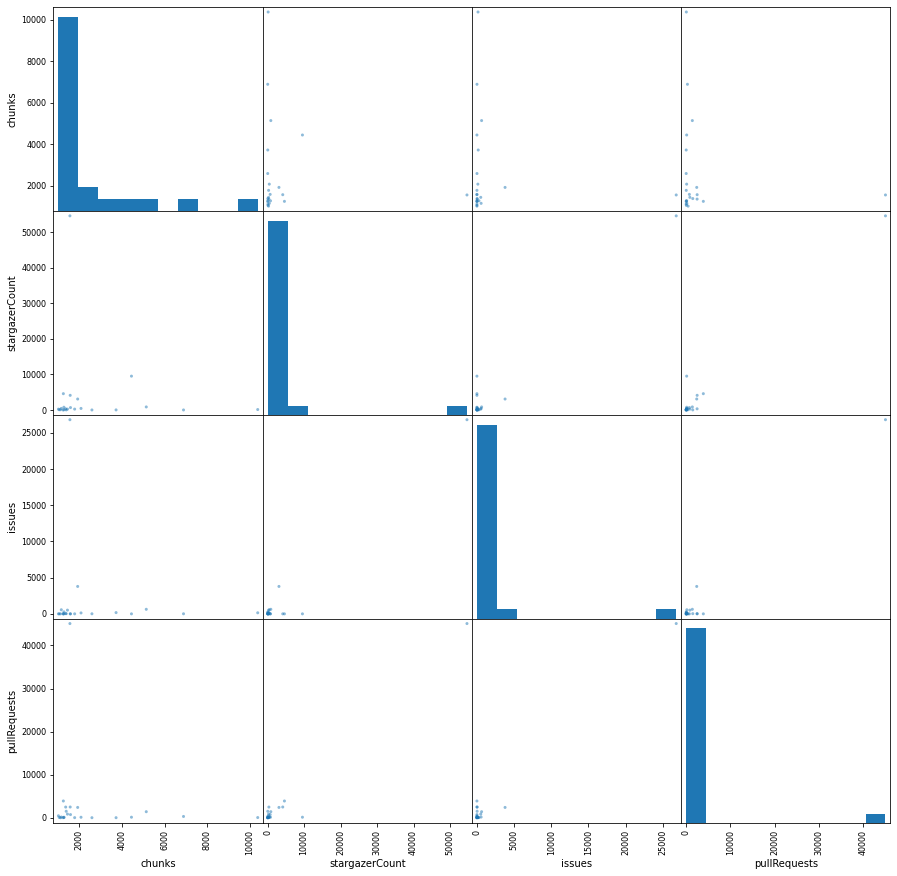

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
ax.set_yscale('log')
ax.set_xscale('log')
pd.plotting.scatter_matrix(selected_projects[["chunks", "stargazerCount", "issues", "primaryLanguage", "pullRequests"]], alpha=0.5, ax=ax)

### Scatterplot matrix of the dataset

<ipython-input-16-fc4bee828ce5>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(api_data[["chunks", "stargazerCount", "issues", "primaryLanguage", "pullRequests"]], alpha=0.5, ax=ax)


array([[<AxesSubplot:xlabel='chunks', ylabel='chunks'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='chunks'>,
        <AxesSubplot:xlabel='issues', ylabel='chunks'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='chunks'>],
       [<AxesSubplot:xlabel='chunks', ylabel='stargazerCount'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='stargazerCount'>,
        <AxesSubplot:xlabel='issues', ylabel='stargazerCount'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='stargazerCount'>],
       [<AxesSubplot:xlabel='chunks', ylabel='issues'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='issues'>,
        <AxesSubplot:xlabel='issues', ylabel='issues'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='issues'>],
       [<AxesSubplot:xlabel='chunks', ylabel='pullRequests'>,
        <AxesSubplot:xlabel='stargazerCount', ylabel='pullRequests'>,
        <AxesSubplot:xlabel='issues', ylabel='pullRequests'>,
        <AxesSubplot:xlabel='pullRequests', ylabel='pullR

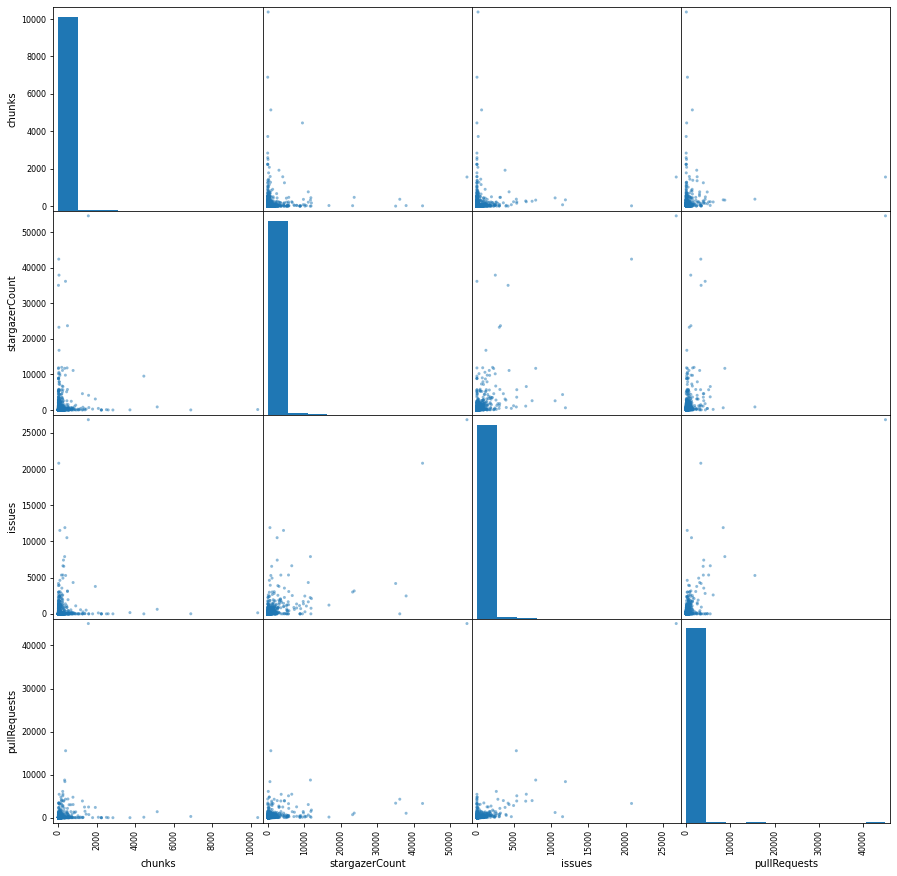

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
ax.set_yscale('log')
ax.set_xscale('log')
pd.plotting.scatter_matrix(api_data[["chunks", "stargazerCount", "issues", "primaryLanguage", "pullRequests"]], alpha=0.5, ax=ax)

### List of attributes of the dataset

In [17]:
list(selected_projects)

['id',
 'project',
 'project_new_ownername',
 'chunks',
 'repo_not_found',
 'project_actual_ownername',
 'resourcePath',
 'stargazerCount',
 'isFork',
 'deleteBranchOnMerge',
 'mergeCommitAllowed',
 'primaryLanguage',
 'rebaseMergeAllowed',
 'squashMergeAllowed',
 'issues',
 'pullRequests',
 'releases',
 'watchers',
 'forks',
 'forkCount',
 'commits',
 'contributors',
 'branches',
 'tags',
 'NA']